## 군집분석

In [114]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [115]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [116]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
df_y = df_raw[['SPECIES']]
df_raw = df_raw.drop(columns = ['SPECIES'])

In [118]:
display(df_raw.head())

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 데이터 전처리 - Scaling

In [119]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [120]:
df_raw_y = df_y
df_raw_x = df_raw_scaled

In [121]:
df_raw_x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [122]:
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [123]:
# 군집 생성 결과 확인
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.72216546e

Text(0, 0.5, 'Distance')

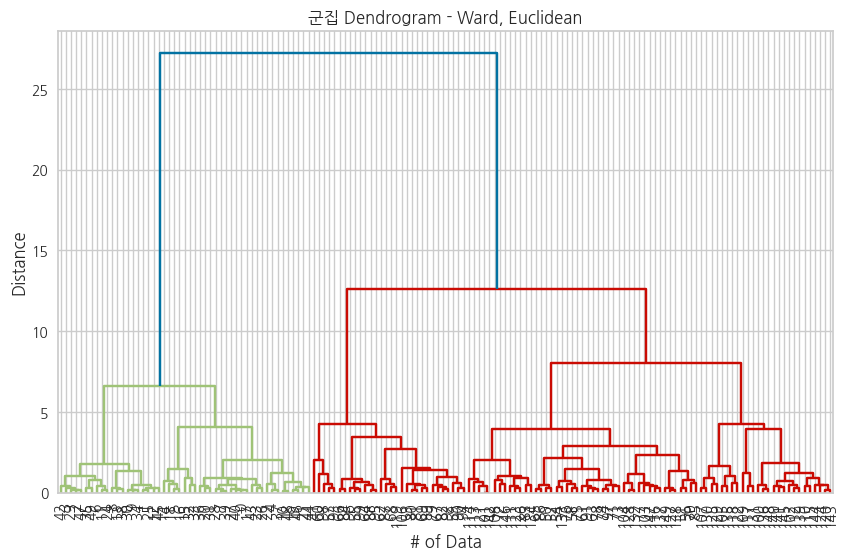

In [124]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Euclidean ward 방식으로 군집분석 진행

Text(0, 0.5, 'Distance')

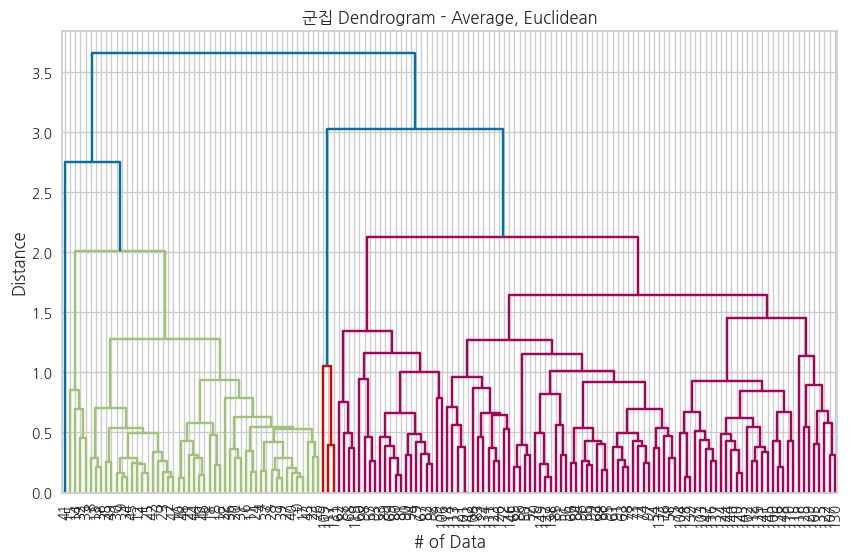

In [125]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Euclidean average 방식으로 군집분석 진행

In [126]:
cluster_H = fcluster(Z = Z_ward, t = 10, criterion="distance")
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [127]:
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.016,5.8,2.9,3.451,4.4,1.0,1.465,1.9,0.1,0.245,0.6
1,2,4.5,5.530,6.3,2.0,2.567,3.0,1.3,3.930,5.0,0.3,1.207,1.7
2,3,5.6,6.546,7.9,2.5,2.993,3.8,4.0,5.268,6.9,1.2,1.855,2.5


각 군집 별로 평균, 최대값, 최소값 등을 확인함

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

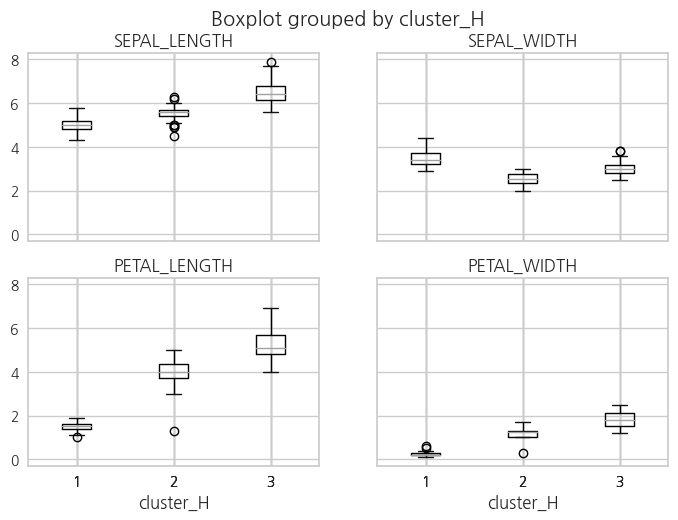

In [128]:
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

SEPAL_LENGTH의 평균이 다른 군에 비해 높게 형성됨

In [129]:
df_raw['SPECIES'] = df_raw_y

In [130]:
df_raw

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,SPECIES
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,virginica
146,6.3,2.5,5.0,1.9,3,virginica
147,6.5,3.0,5.2,2.0,3,virginica
148,6.2,3.4,5.4,2.3,3,virginica


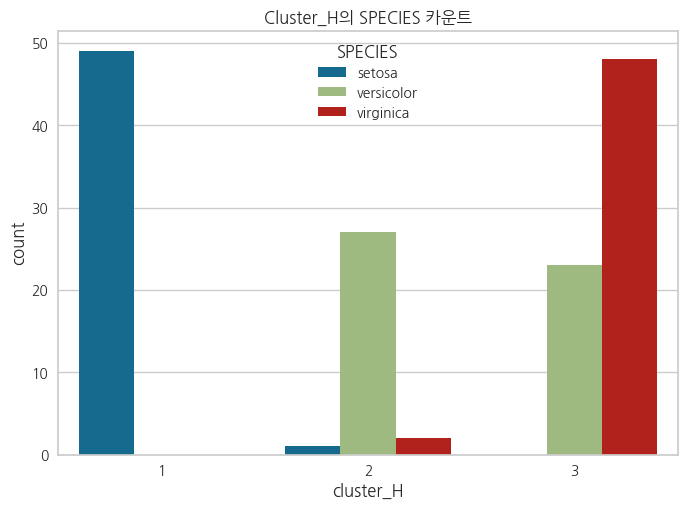

In [149]:
cluster_species_count = df_raw.groupby(['cluster_H', 'SPECIES']).size().reset_index(name='count')

# 시각화
sns.barplot(x='cluster_H', y='count', hue='SPECIES', data=cluster_species_count)
plt.title('Cluster_H의 SPECIES 카운트')
plt.show()

versicolor의 카운트가 다른 데에 비해 훨씬 작게 나왔으며 setosa의 카운트가 제일 높게 나왔음

In [132]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

,NumberofCluster,Error
0,1,600.000
1,2,222.362
2,3,139.820
3,4,114.092
4,5,90.928
5,6,80.037
6,7,71.576
7,8,63.890
8,9,54.111
9,10,47.585


Text(0, 0.5, 'Sum of Square')

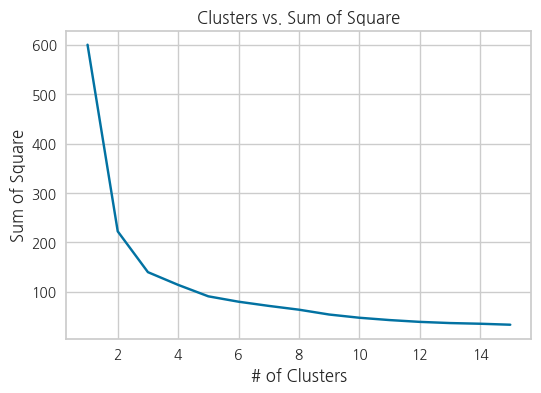

In [133]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

clustering의 수가 많아질 수록 에러율이 낮아지는 걸 볼 수 있다.

In [135]:
clus = KMeans(3)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,SPECIES,cluster_KM
0,5.1,3.5,1.4,0.2,1,setosa,1
1,4.9,3.0,1.4,0.2,1,setosa,1
2,4.7,3.2,1.3,0.2,1,setosa,1
3,4.6,3.1,1.5,0.2,1,setosa,1
4,5.0,3.6,1.4,0.2,1,setosa,1
5,5.4,3.9,1.7,0.4,1,setosa,1
6,4.6,3.4,1.4,0.3,1,setosa,1
7,5.0,3.4,1.5,0.2,1,setosa,1
8,4.4,2.9,1.4,0.2,1,setosa,1
9,4.9,3.1,1.5,0.1,1,setosa,1


In [136]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

/tmp/ipykernel_23117/3310844571.py:2: FutureWarning: ['SPECIES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  groupby("cluster_KM").agg(["min", "mean", "max"])


,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6
1,2,5.9,6.781,7.9,2.5,3.096,3.8,4.4,5.511,6.9,1.4,1.972,2.5
2,3,4.9,5.802,6.6,2.0,2.674,3.0,3.0,4.370,5.6,1.0,1.413,2.4


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>]],
      dtype=object)

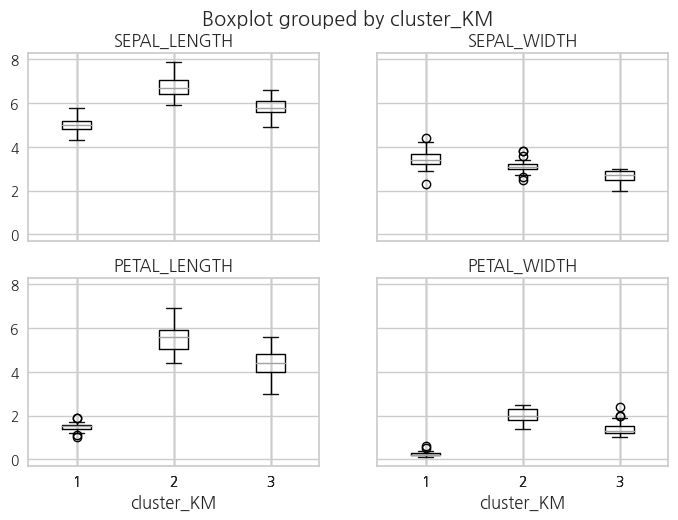

In [137]:
# Boxplot을 활용한 군집별 tjfaud변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_KM")

In [140]:
df_final = df_raw

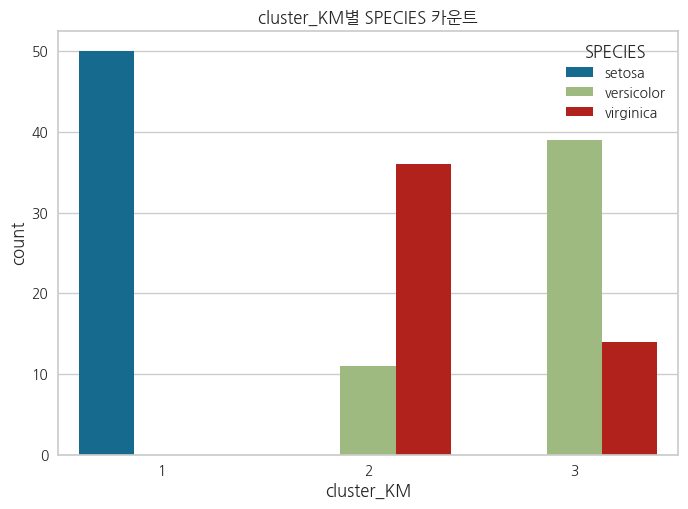

In [141]:
cluster_species_count = df_final.groupby(['cluster_KM', 'SPECIES']).size().reset_index(name='count')

# 시각화
sns.barplot(x='cluster_KM', y='count', hue='SPECIES', data=cluster_species_count)
plt.title('cluster_KM별 SPECIES 카운트')
plt.show()

이전의 clustering 방식 보다 훨씬 잘 분류되었으며 그중 versicolor, virginica도 이전보다 잘 분류되었음을 알 수 있다.

In [142]:
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.447
계층형(군집 수=4) 실루엣 계수 =  0.401


군집 수 차이에 따른 실루엣 계수 변화가 나타난다

In [143]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k-평균(군집 수=3) 실루엣 계수 =  0.46
k-평균(군집 수=4) 실루엣 계수 =  0.387


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/piai/anaconda3/lib/pyt

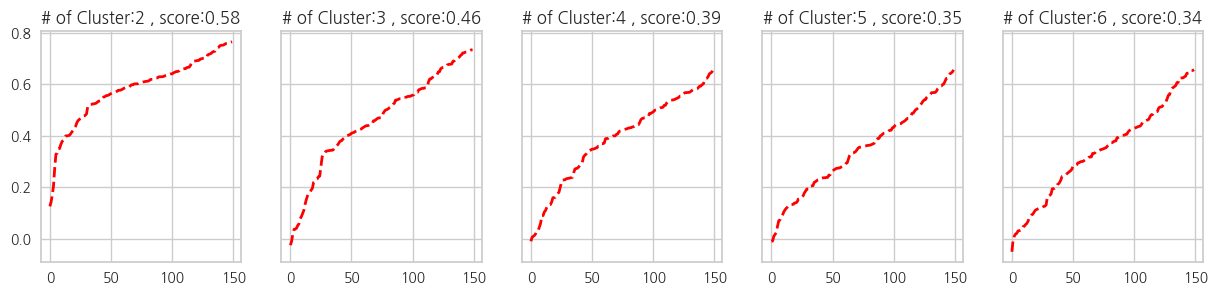

In [144]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


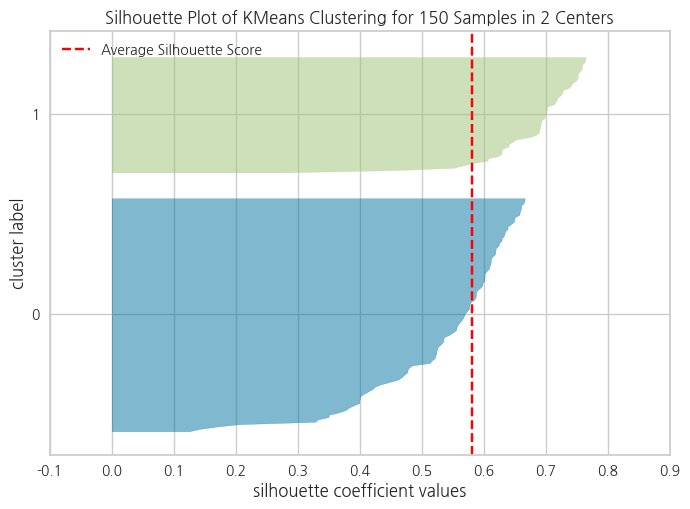

실루엣 계수 =  0.5818


In [145]:
clus = KMeans(2)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


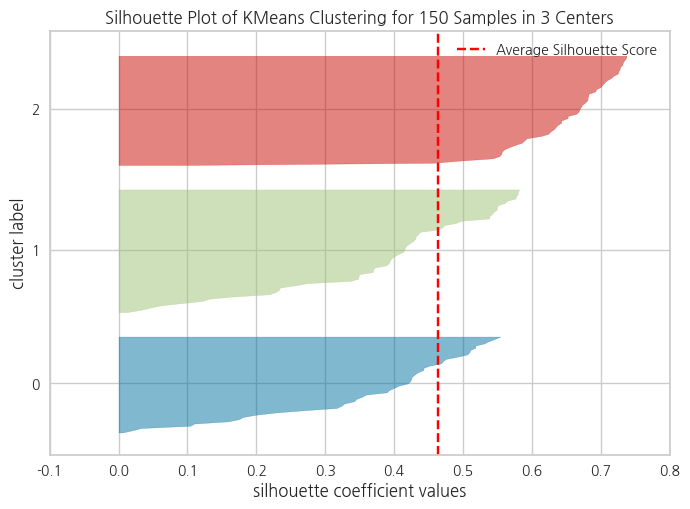

실루엣 계수 =  0.463


In [146]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


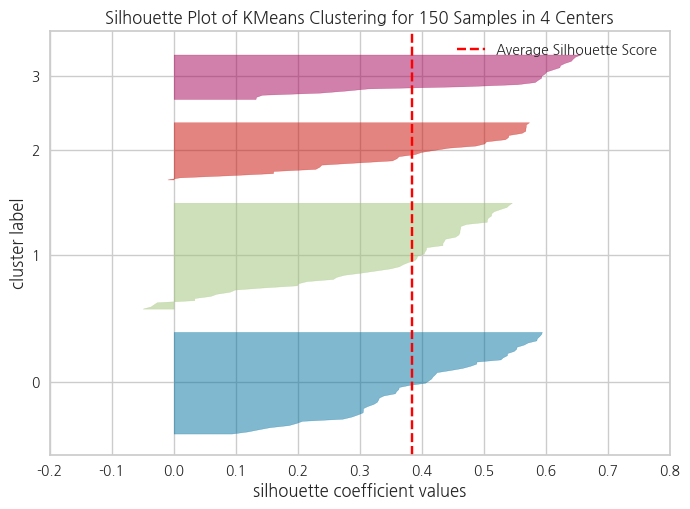

실루엣 계수 =  0.385


In [147]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


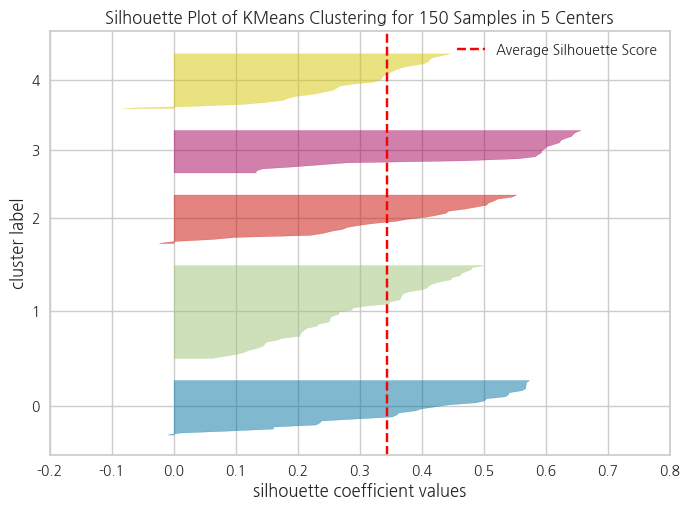

실루엣 계수 =  0.3438


In [148]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

클러스터의 개수가 늘어날수록 실루엣 계수가 낮아지는데 군집화의 정도가 낮아지는 것으로 생각할 수 있다.

## 연관규칙 분석

In [152]:
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [156]:
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/구매이력.csv", encoding='euc-kr')
df_raw.head(10)

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주
5,CS-104,크래커
6,CS-104,맥주
7,CS-106,양주
8,CS-106,크래커
9,CS-107,맥주


In [158]:
ID = list(set(df_raw["ID"]))
ID.sort()

list_association = []
for i in ID:
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    list_association.append(tmp_list)

for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [169]:
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = list_association)

df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)

df_asso.head(10)

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False
5,True,False,False,False,False
6,True,True,True,False,True
7,True,False,False,False,False
8,True,False,False,True,False
9,True,False,False,True,False


최소 지지도는 데이터 출력되는 정도를 고려하여 0.25로 낮췄다.

In [186]:
v_min_support = 0.25

df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True) # 매개값 사용

df_freq.round(3) 

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.279,"(소다, 맥주)"
6,0.256,"(맥주, 콜라)"
7,0.395,"(맥주, 크래커)"
8,0.279,"(소다, 크래커)"
9,0.256,"(크래커, 양주)"


metric을 confidence, lift를 기준으로 연관규칙 분석을 수행한다.

In [189]:
df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 1.1)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554
1,(크래커),(소다),0.512,0.349,0.279,0.545,1.564,0.101,1.433,0.738
2,(크래커),(양주),0.512,0.442,0.256,0.500,1.132,0.030,1.116,0.238
3,(양주),(크래커),0.442,0.512,0.256,0.579,1.132,0.030,1.160,0.208


우선 lift를 기준으로 matrix를 세웠을 때 소다를 샀을 때 크래커를 살 가능성, 크래커를 샀을 때 소다를 살 가능성이 높다. <br>
크래커를 샀을 때 양주를 살 가능성, 크래커를 샀을 때 양주를 살 가능성이 높았다. <br>
둘의 연관 관계 중 confidence를 좀 더 고려하면 소다와 크래커가 크래커와 양주보다 더 큰 연관성이 있는 것으로 보인다.

In [190]:
df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.6)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
1,(콜라),(맥주),0.372,0.744,0.256,0.688,0.924,-0.021,0.819,-0.116
2,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
3,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554


우선 confidence를 기준으로 matrix를 세웠을 때 소다, 콜라, 크래커를 샀을 때 맥주를 사게 되는 연관성이 높아졌다. <br>
이전에 연관분석한 것과는 다른 결과가 나타난 걸 확인할 수 있다.